In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#Reading the Training set
df_train = pd.read_csv('./train/train.csv')
print df_train.shape

(137, 43)


In [3]:
#Understanding descriptive stats on the training set and visualizing it in pair plots
df_train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4453532.613139
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2576071.595708
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1149870.000000
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2999068.000000
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3939804.000000
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5166635.000000
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,19696939.000000


In [4]:
sns.pairplot(df_train)

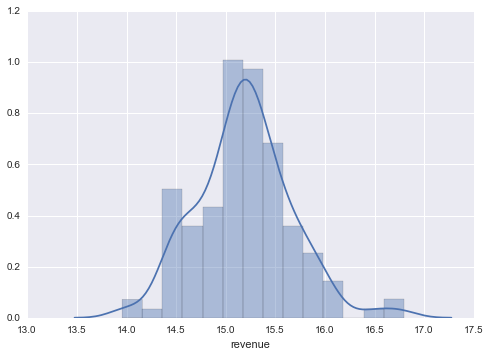

In [4]:
#Taking log transforms on the revenues seemst to normalize the dataset
from sklearn.preprocessing import scale, normalize
sns.distplot(np.log(df_train['revenue']))

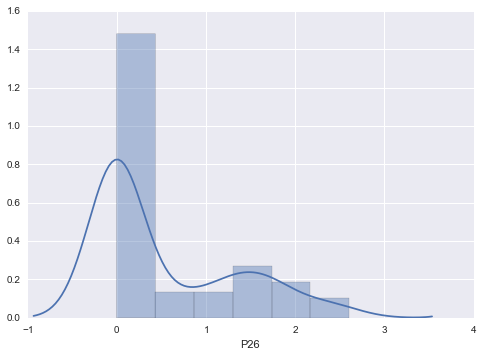

In [5]:
#Taking log transforms on the broadcasted variables +1 seems to kind of reduce the skew in the dataset and introduce modes
sns.distplot(np.log(df_train['P26']+1))

In [202]:
#Function to clean the data frame for the date attributes and convert the categorical variables into dummy variables
def cleanDataframe(df):
    #Create Date Categorical Columns
    df['Open Date'] = df['Open Date'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y'))
    df['Open Month'] = df['Open Date'].apply(lambda x: dt.datetime.strftime(x,'%b'))
    df['Open Year'] = df['Open Date'].apply(lambda x: dt.datetime.strftime(x,'%Y'))
    #Drop Open Date
    df.drop(['Open Date'], inplace=True, axis=1)

    #Create Cateogorical Variables and then drop the original variables from the dataframe
    df = pd.concat([df, pd.get_dummies(df['Open Month'], prefix='Mon')], axis=1)
    df.drop(['Open Month'], inplace=True, axis=1)
    df = pd.concat([df, pd.get_dummies(df['Open Year'], prefix='Yr')], axis=1)
    df.drop(['Open Year'], inplace=True, axis=1)
    df = pd.concat([df, pd.get_dummies(df['Type'], prefix='Type')], axis=1)
    df.drop(['Type'], inplace=True, axis=1)
    df = pd.concat([df, pd.get_dummies(df['City Group'], prefix='CGroup')], axis=1)
    df.drop(['City Group'], inplace=True, axis=1)
    df = pd.concat([df, pd.get_dummies(df['City'], prefix='City')], axis=1)
    df.drop(['City'], inplace=True, axis=1)
    return df

In [203]:
#Function to return the dependent and independent variables in the dataframe #NOT USED
def splitDependentIndependentVariables(df):
    #set revenue as dependent variable
    df_y = df['revenue']
    #set rest all as independent variables
    df_x = df.drop('revenue', axis=1)
    return df_y, df_x

In [204]:
df_train = pd.read_csv('./train/train.csv')
print df_train.shape
df_test = pd.read_csv('./test/test.csv')
print df_test.shape

(137, 43)
(100000, 42)


In [205]:
#Set dependent variable y
df_y_train = df_train['revenue']
#Keep the training set without the dependent variable y (reveneue)
df_train = df_train.drop('revenue', axis=1)
print df_train.head()

   Id   Open Date        City  City Group Type  P1   P2  P3  P4  P5 ...   P28  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0   4   4   2 ...   2.0   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0   4   4   1 ...   3.0   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0   2   5   2 ...   1.0   
3   3  02/02/2012       Tokat       Other   IL   6  4.5   6   6   4 ...   2.5   
4   4  05/09/2009   Gaziantep       Other   IL   3  4.0   3   4   2 ...   1.0   

   P29  P30  P31  P32  P33  P34  P35  P36  P37  
0  3.0    5    3    4    5    5    4    3    4  
1  3.0    0    0    0    0    0    0    0    0  
2  3.0    0    0    0    0    0    0    0    0  
3  7.5   25   12   10    6   18   12   12    6  
4  3.0    5    1    3    2    3    4    3    3  

[5 rows x 42 columns]


In [206]:
#Concatenate the train set to the end of the test set before creating categorical variables
df_concat = pd.concat([df_test,df_train], axis=0)
print df_concat.iloc[-138:,:].head()
print df_concat.shape

          Id   Open Date        City  City Group Type  P1   P2  P3  P4  P5  \
99999  99999  10/05/2010    İstanbul  Big Cities   IL   2  5.0   4   4   2   
0          0  07/17/1999    İstanbul  Big Cities   IL   4  5.0   4   4   2   
1          1  02/14/2008      Ankara  Big Cities   FC   4  5.0   4   4   1   
2          2  03/09/2013  Diyarbakır       Other   IL   2  4.0   2   5   2   
3          3  02/02/2012       Tokat       Other   IL   6  4.5   6   6   4   

      ...   P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  
99999 ...   5.0  3.0    0    2    0    2    2    4    2    0  
0     ...   2.0  3.0    5    3    4    5    5    4    3    4  
1     ...   3.0  3.0    0    0    0    0    0    0    0    0  
2     ...   1.0  3.0    0    0    0    0    0    0    0    0  
3     ...   2.5  7.5   25   12   10    6   18   12   12    6  

[5 rows x 42 columns]
(100137, 42)


In [207]:
df_cleanConcat = cleanDataframe(df_concat)
print df_cleanConcat.shape
print df_cleanConcat.head()

(100137, 139)
   Id  P1  P2  P3  P4  P5  P6  P7  P8  P9       ...        City_Trabzon  \
0   0   1   4   4   4   1   2   5   4   5       ...                   0   
1   1   3   4   4   4   2   2   5   3   4       ...                   0   
2   2   3   4   4   4   2   2   5   4   4       ...                   0   
3   3   2   4   4   4   2   3   5   4   5       ...                   0   
4   4   2   4   4   4   1   2   5   4   5       ...                   0   

   City_Uşak  City_Yalova  City_Zonguldak  City_Çanakkale  City_Çankırı  \
0          0            0               0               0             0   
1          0            0               0               0             0   
2          0            0               0               0             0   
3          0            0               0               0             0   
4          0            0               0               0             0   

   City_Çorum  City_İstanbul  City_İzmir  City_Şanlıurfa  
0           0            

In [208]:
#Setting test sets after categorical polishing
df_x_train = df_cleanConcat.iloc[-137:,:]
print df_x_train.head()
print df_x_train.shape

#Set dependent variable as the earlier one
print df_y_train.shape

   Id  P1   P2  P3  P4  P5  P6  P7  P8  P9       ...        City_Trabzon  \
0   0   4  5.0   4   4   2   2   5   4   5       ...                   0   
1   1   4  5.0   4   4   1   2   5   5   5       ...                   0   
2   2   2  4.0   2   5   2   3   5   5   5       ...                   0   
3   3   6  4.5   6   6   4   4  10   8  10       ...                   0   
4   4   3  4.0   3   4   2   2   5   5   5       ...                   0   

   City_Uşak  City_Yalova  City_Zonguldak  City_Çanakkale  City_Çankırı  \
0          0            0               0               0             0   
1          0            0               0               0             0   
2          0            0               0               0             0   
3          0            0               0               0             0   
4          0            0               0               0             0   

   City_Çorum  City_İstanbul  City_İzmir  City_Şanlıurfa  
0           0              1     

In [209]:
print df_x_train.ix[:,1:37].head()
columns = list(df_x_train.ix[:,1:37].columns)

   P1   P2  P3  P4  P5  P6  P7  P8  P9  P10 ...   P27  P28  P29  P30  P31  \
0   4  5.0   4   4   2   2   5   4   5    5 ...   4.0  2.0  3.0    5    3   
1   4  5.0   4   4   1   2   5   5   5    5 ...   0.0  3.0  3.0    0    0   
2   2  4.0   2   5   2   3   5   5   5    5 ...   0.0  1.0  3.0    0    0   
3   6  4.5   6   6   4   4  10   8  10   10 ...   2.5  2.5  7.5   25   12   
4   3  4.0   3   4   2   2   5   5   5    5 ...   5.0  1.0  3.0    5    1   

   P32  P33  P34  P35  P36  
0    4    5    5    4    3  
1    0    0    0    0    0  
2    0    0    0    0    0  
3   10    6   18   12   12  
4    3    2    3    4    3  

[5 rows x 36 columns]


In [210]:
for cols in columns:
    if min(df_x_train[cols]) == 0:
        print "Columns " + cols + " has minumum value = 0"
        df_x_train.loc[:,cols] += 1

Columns P3 has minumum value = 0
Columns P14 has minumum value = 0
Columns P15 has minumum value = 0
Columns P16 has minumum value = 0
Columns P17 has minumum value = 0
Columns P18 has minumum value = 0
Columns P24 has minumum value = 0
Columns P25 has minumum value = 0
Columns P26 has minumum value = 0
Columns P27 has minumum value = 0
Columns P29 has minumum value = 0
Columns P30 has minumum value = 0
Columns P31 has minumum value = 0
Columns P32 has minumum value = 0
Columns P33 has minumum value = 0
Columns P34 has minumum value = 0
Columns P35 has minumum value = 0
Columns P36 has minumum value = 0


In [211]:
print df_x_train.ix[:,1:37].head()

   P1   P2  P3  P4  P5  P6  P7  P8  P9  P10 ...   P27  P28  P29  P30  P31  \
0   4  5.0   5   4   2   2   5   4   5    5 ...   5.0  2.0  4.0    6    4   
1   4  5.0   5   4   1   2   5   5   5    5 ...   1.0  3.0  4.0    1    1   
2   2  4.0   3   5   2   3   5   5   5    5 ...   1.0  1.0  4.0    1    1   
3   6  4.5   7   6   4   4  10   8  10   10 ...   3.5  2.5  8.5   26   13   
4   3  4.0   4   4   2   2   5   5   5    5 ...   6.0  1.0  4.0    6    2   

   P32  P33  P34  P35  P36  
0    5    6    6    5    4  
1    1    1    1    1    1  
2    1    1    1    1    1  
3   11    7   19   13   13  
4    4    3    4    5    4  

[5 rows x 36 columns]


In [212]:
#Dropping ID in the feature set and keeping only continuous variables for training set
df_x_train_fs = df_x_train.ix[:,1:37]
#Taking log of the features in the training set
df_x_train_fs = np.log(df_x_train_fs)
print df_x_train_fs.head()
print df_x_train_fs.shape

         P1        P2        P3        P4        P5        P6        P7  \
0  1.386294  1.609438  1.609438  1.386294  0.693147  0.693147  1.609438   
1  1.386294  1.609438  1.609438  1.386294  0.000000  0.693147  1.609438   
2  0.693147  1.386294  1.098612  1.609438  0.693147  1.098612  1.609438   
3  1.791759  1.504077  1.945910  1.791759  1.386294  1.386294  2.302585   
4  1.098612  1.386294  1.386294  1.386294  0.693147  0.693147  1.609438   

         P8        P9       P10    ...          P27       P28       P29  \
0  1.386294  1.609438  1.609438    ...     1.609438  0.693147  1.386294   
1  1.609438  1.609438  1.609438    ...     0.000000  1.098612  1.386294   
2  1.609438  1.609438  1.609438    ...     0.000000  0.000000  1.386294   
3  2.079442  2.302585  2.302585    ...     1.252763  0.916291  2.140066   
4  1.609438  1.609438  1.609438    ...     1.791759  0.000000  1.386294   

        P30       P31       P32       P33       P34       P35       P36  
0  1.791759  1.386294  1

In [213]:
#Taking log of the dependent variable revenue
df_y_train_fs = np.log(df_y_train)
print df_y_train_fs.head()

0    15.547830
1    15.750379
2    14.535971
3    14.799651
4    15.278005
Name: revenue, dtype: float64


In [214]:
#Usine Linear Regression for feature selection amidst the continuous variables P1 to P36
#Using Stats models for Linear Regression
regressionCount = 1
old_adjRsquare = 0.0

#Adding column for Constant in the independent variable X dataframe
sm.add_constant(df_x_train_fs)
#Fit and summarize OLS model
mod = sm.OLS(df_y_train_fs, df_x_train_fs)
res = mod.fit()
print res.summary()
old_adjRsquare = res.rsquared_adj
print("First Regression Adjusted R-Square: %0.4f" %old_adjRsquare)

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1181.
Date:                Mon, 04 May 2015   Prob (F-statistic):          9.78e-118
Time:                        21:19:58   Log-Likelihood:                -153.07
No. Observations:                 137   AIC:                             378.1
Df Residuals:                     101   BIC:                             483.3
Df Model:                          36                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
P1            -1.2897      0.423     -3.053      0.003        -2.128    -0.452
P2             1.5045      0.411      3.659      0.0

In [215]:
#Multiple regressions for the best adjusted R-Square and the variables therein
new_adjRSquare = 1.0
while new_adjRSquare > old_adjRsquare:
    if new_adjRSquare != 1:
        old_adjRsquare = new_adjRSquare
        
    regressionCount += 1       
    print("Dropping Max p-Value Attribute: "+ res.params[res.pvalues == max(res.pvalues)].index[0] + " from X Variables")
    maxPvalue_Param = res.params[res.pvalues == max(res.pvalues)].index[0]
    df_x_train_fs.drop([maxPvalue_Param], axis=1, inplace=True)
    
    mod = sm.OLS(df_y_train_fs, df_x_train_fs)
    res = mod.fit()
    #print res.summary()
    new_adjRSquare = res.rsquared_adj
    print("Internal Regression Adjusted R-Square: %0.4f" %new_adjRSquare)

Dropping Max p-Value Attribute: P21 from X Variables
Internal Regression Adjusted R-Square: 0.9968
Dropping Max p-Value Attribute: P31 from X Variables
Internal Regression Adjusted R-Square: 0.9968
Dropping Max p-Value Attribute: P14 from X Variables
Internal Regression Adjusted R-Square: 0.9969
Dropping Max p-Value Attribute: P26 from X Variables
Internal Regression Adjusted R-Square: 0.9969
Dropping Max p-Value Attribute: P24 from X Variables
Internal Regression Adjusted R-Square: 0.9969
Dropping Max p-Value Attribute: P34 from X Variables
Internal Regression Adjusted R-Square: 0.9970
Dropping Max p-Value Attribute: P32 from X Variables
Internal Regression Adjusted R-Square: 0.9970
Dropping Max p-Value Attribute: P30 from X Variables
Internal Regression Adjusted R-Square: 0.9970
Dropping Max p-Value Attribute: P15 from X Variables
Internal Regression Adjusted R-Square: 0.9970
Dropping Max p-Value Attribute: P27 from X Variables
Internal Regression Adjusted R-Square: 0.9971
Dropping M

In [216]:
#Result summary from the best regression
alpha = 0.05
print res.summary()
#Selection significant attributes with alpha = 0.05
print("Number of Significant Attributes in the Dataset with alpha(0.05): %d" %len(res.params[res.pvalues <= alpha]))
sig_Attributes = list(res.params[res.pvalues <= alpha].index)
print sig_Attributes

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2475.
Date:                Mon, 04 May 2015   Prob (F-statistic):          5.70e-144
Time:                        21:20:01   Log-Likelihood:                -156.82
No. Observations:                 137   AIC:                             351.6
Df Residuals:                     118   BIC:                             407.1
Df Model:                          19                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
P1            -1.4507      0.327     -4.432      0.000        -2.099    -0.803
P2             1.6192      0.362      4.475      0.0

Axes(0.125,0.125;0.775x0.775)
count    1.500000e+01
mean     8.136349e-03
std      1.173828e-02
min      4.500599e-21
25%      1.935749e-05
50%      2.364774e-03
75%      1.321866e-02
max      3.296675e-02
dtype: float64


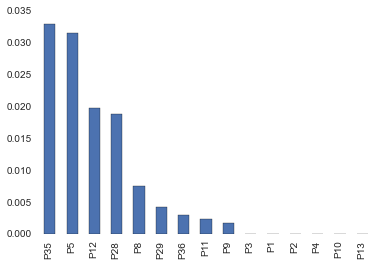

In [217]:
#Plotting the significant variables to see what the p-values are
s_features = pd.Series(data=res.pvalues[res.pvalues <= alpha].values,index=res.params[res.pvalues <= alpha].index)
s_features.sort(ascending=False, inplace=True)
print s_features.plot(kind='bar')
print s_features.describe()

In [218]:
#Concatenating the significant continuous variables with the list of cataegorical dummy variables we created
ls_sigfeatures = list(s_features.index) + list(df_x_train.columns[37:])
print ls_sigfeatures

['P35', 'P5', 'P12', 'P28', 'P8', 'P29', 'P36', 'P11', 'P9', 'P3', 'P1', 'P2', 'P4', 'P10', 'P13', 'P37', 'Mon_Apr', 'Mon_Aug', 'Mon_Dec', 'Mon_Feb', 'Mon_Jan', 'Mon_Jul', 'Mon_Jun', 'Mon_Mar', 'Mon_May', 'Mon_Nov', 'Mon_Oct', 'Mon_Sep', 'Yr_1995', 'Yr_1996', 'Yr_1997', 'Yr_1998', 'Yr_1999', 'Yr_2000', 'Yr_2001', 'Yr_2002', 'Yr_2003', 'Yr_2004', 'Yr_2005', 'Yr_2006', 'Yr_2007', 'Yr_2008', 'Yr_2009', 'Yr_2010', 'Yr_2011', 'Yr_2012', 'Yr_2013', 'Yr_2014', 'Type_DT', 'Type_FC', 'Type_IL', 'Type_MB', 'CGroup_Big Cities', 'CGroup_Other', 'City_Adana', 'City_Afyonkarahisar', 'City_Aksaray', 'City_Amasya', 'City_Ankara', 'City_Antalya', 'City_Artvin', 'City_Ayd\xc4\xb1n', 'City_Bal\xc4\xb1kesir', 'City_Batman', 'City_Bilecik', 'City_Bolu', 'City_Bursa', 'City_Denizli', 'City_Diyarbak\xc4\xb1r', 'City_D\xc3\xbczce', 'City_Edirne', 'City_Elaz\xc4\xb1\xc4\x9f', 'City_Erzincan', 'City_Erzurum', 'City_Eski\xc5\x9fehir', 'City_Gaziantep', 'City_Giresun', 'City_Hatay', 'City_Isparta', 'City_Kahraman

In [219]:
#Setting up the Dependent and independent variables again with the significant features for Gradient Boosting
df_x_train_fs = df_x_train[ls_sigfeatures]
df_y_train_fs = df_y_train

In [220]:
#Scaling after selecing significant features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(df_x_train_fs.values)
#For Dependent variable y, taking log transform
y_train = scaler.fit_transform(np.log(df_y_train_fs.values))

In [221]:
#GradientBoost Regression
from sklearn.ensemble import GradientBoostingRegressor
GBoost_Regressor1 = GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_leaf_nodes=5,
                                              n_estimators=500)
GBoost_Regressor1.fit(x_train,y_train)
GBoost_Regressor1
y_predict = GBoost_Regressor1.predict(x_train)
y_predict

array([ 0.5546464 ,  0.26002355, -1.21472871, -0.30769651, -0.33888763,
        0.03759058,  0.21748433,  0.39094686, -0.03523458,  0.26576649,
       -0.38826078,  0.27760953, -1.33775094,  0.46134844, -0.45129564,
       -0.10598281,  2.33301911,  0.525711  ,  0.3471107 , -0.23823253,
        0.04028871, -1.42782536,  0.3273627 , -0.31317449,  0.92397217,
       -0.07948667, -0.5195307 ,  0.67935223,  0.61207461, -0.61606432,
       -0.68672369, -0.17808547, -0.45229746, -0.77612526,  0.23743911,
        0.16186406, -0.30962114, -0.47150329,  0.34271212,  0.26668488,
        0.48251793,  0.5711493 ,  0.45803761, -0.55304378, -0.3469939 ,
        0.13639472,  0.0125161 ,  0.76022619,  0.41697262,  0.65077502,
       -0.42102736, -0.48447461, -1.10594701, -0.29511615,  0.1827523 ,
        0.61952184, -0.55923562,  0.07348172, -0.01155681,  0.02752449,
       -0.37493841,  0.60446612, -0.02340853, -1.23571973, -0.24276044,
       -1.33290742, -0.55106903,  0.52364727,  0.16409982, -0.33

In [222]:
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error
print explained_variance_score(y_train, y_predict)
print mean_squared_error(y_train, y_predict)
print np.sqrt(mean_squared_error(y_train, y_predict))
print mean_absolute_error(y_train, y_predict)
print GBoost_Regressor1.score(x_train, y_predict)

0.69385009388
0.30614990612
0.553308147528
0.451343695976
1.0


MSE and RMSE seems to the best in all the approaches I've tried so far. 70% of explained variance in the data too,which is pretty good.

In [223]:
#crossvalidate the training set
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(GBoost_Regressor1, x_train, y_train, cv=5, scoring='mean_squared_error')
print scores
print abs(scores)
print np.sqrt(np.mean(abs(scores)))

[-1.40397946 -0.58866636 -0.82698839 -0.89161229 -1.07512802]
[ 1.40397946  0.58866636  0.82698839  0.89161229  1.07512802]
0.97840426391


Pretty Good result for the Cross validation.

In [224]:
#Setting test sets after categorical polishing
df_x_test = df_cleanConcat.iloc[:100000,:]
print df_x_test.shape

#No dependent variable available for the test set
#Select the significant features for x_test
df_x_test = df_x_test[ls_sigfeatures]
print df_x_test.head()

(100000, 139)
   P35  P5  P12  P28  P8  P29  P36  P11  P9  P3       ...        City_Trabzon  \
0    0   1    3    2   4    3    0    5   5   4       ...                   0   
1    0   2    4    1   3    3    0    2   4   4       ...                   0   
2    0   2    5    2   4    3    0    4   4   4       ...                   0   
3    0   2    4    2   4    3    0    3   5   4       ...                   0   
4    0   1    5    5   4    3    0    3   5   4       ...                   0   

   City_Uşak  City_Yalova  City_Zonguldak  City_Çanakkale  City_Çankırı  \
0          0            0               0               0             0   
1          0            0               0               0             0   
2          0            0               0               0             0   
3          0            0               0               0             0   
4          0            0               0               0             0   

   City_Çorum  City_İstanbul  City_İzmir  City_Ş

In [225]:
#Using the old scalar to scale and transform the test data set
x_test = scaler.fit_transform(df_x_test.values)
#Predicting the y_test for the test data set
y_test_predict = GBoost_Regressor1.predict(x_test)
print y_test_predict
scaler.fit_transform(df_y_train.values)
y_test_predict = scaler.inverse_transform(y_test_predict)
print y_test_predict

[-0.18383979 -0.76388726 -0.93008541 ...,  0.37371449 -0.36281645
  0.31834183]
[ 3981679.73956607  2492899.35764442  2066326.4363478  ...,
  5412727.90041516  3522308.80124586  5270605.51601053]


In [226]:
df_predict = pd.DataFrame(data = y_test_predict, index=df_x_test.index, columns = ['Predicted Revenues'])
print df_predict.head()
print df_predict.shape

   Predicted Revenues
0      3981679.739566
1      2492899.357644
2      2066326.436348
3      2343616.081121
4      3137834.967539
(100000, 1)


In [227]:
#Optimize the Gradient Boosted Regressions using GridSearch
param_grid={'n_estimators': [200, 300, 400, 500], 'max_depth': [1,2,3,4], 
            'max_leaf_nodes': [2,3,4,5,], 'learning_rate': [1.0,0.1,0.01]}

In [228]:
from sklearn.grid_search import GridSearchCV
gridModel = GridSearchCV(GradientBoostingRegressor(), param_grid, scoring='mean_squared_error', n_jobs=2, cv=5)
gridModel

GridSearchCV(cv=5,
       estimator=GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2, n_estimators=100,
             random_state=None, subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=2,
       param_grid={'n_estimators': [200, 300, 400, 500], 'max_leaf_nodes': [2, 3, 4, 5], 'learning_rate': [1.0, 0.1, 0.01], 'max_depth': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='mean_squared_error', verbose=0)

In [229]:
gridModel.fit(x_train,y_train)
gridModel.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'max_leaf_nodes': 5,
 'n_estimators': 200}

In [230]:
gridModel.best_score_

-0.90153641910596116

In [231]:
y_predict = gridModel.predict(x_train)
print y_predict

[  4.55089631e-01   1.10710992e-01  -9.98966746e-01  -9.88495956e-02
  -2.80907623e-01   8.05048734e-02   8.12517694e-02   3.31878409e-01
  -1.64199717e-01   1.89908493e-01  -3.50662978e-01   2.66619430e-01
  -1.02258559e+00   3.32796353e-01  -1.94925880e-01   1.19806974e-01
   1.69411171e+00   3.72478339e-01   2.12285461e-01  -1.60494525e-01
  -1.13468998e-01  -6.98853291e-01   2.19076297e-01  -1.60494525e-01
   6.40703540e-01   4.33055913e-02  -2.73609882e-01   4.78626210e-01
   3.31878409e-01  -4.65601652e-01  -4.87726822e-01   1.18162475e-01
  -4.41982811e-01  -6.43633384e-01   2.95787234e-01   1.89908493e-01
  -2.37310730e-01  -2.99275225e-01   2.12485103e-01   2.16001671e-01
   3.31878409e-01   3.31878409e-01   4.28665705e-01  -4.60350414e-01
  -2.10982468e-01   1.93007402e-01  -2.90578674e-02   4.53247730e-01
   2.36077581e-01   3.62179008e-01  -2.73609882e-01  -4.49204570e-01
  -9.98966746e-01  -4.53919340e-01   1.12213916e-01   3.62179008e-01
  -3.63341967e-01  -2.32460709e-02

In [232]:
print explained_variance_score(y_train, y_predict)
print mean_squared_error(y_train, y_predict)
print np.sqrt(mean_squared_error(y_train, y_predict))
print mean_absolute_error(y_train, y_predict)
print gridModel.score(x_train, y_predict)

0.479803833366
0.520196166634
0.721246259355
0.563878973698
1.0


In [233]:
y_test_predict = gridModel.predict(x_test)
print y_test_predict
scaler.fit_transform(df_y_train.values)
y_test_predict = scaler.inverse_transform(y_test_predict)
print y_test_predict

[-0.16049453 -0.44198281 -0.71820725 ...,  0.2921059  -0.33417416
  0.30362855]
[ 4041598.91361132  3319116.25672646  2610144.07988484 ...,
  5203266.98868846  3595823.61020193  5232841.63545341]


In [234]:
df_predict = pd.DataFrame(data = y_test_predict, index=df_x_test.index, columns = ['Predicted Revenues'])
print df_predict.head()
print df_predict.shape

   Predicted Revenues
0      4041598.913611
1      3319116.256726
2      2610144.079885
3      2778011.320996
4      3264941.374813
(100000, 1)


In [235]:
df_predict.to_csv('RestaurantRevenue_Submission.csv')

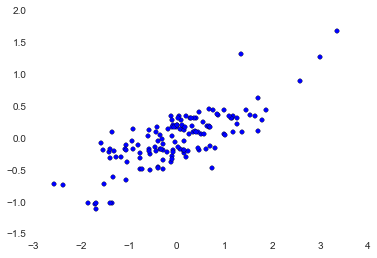

In [236]:
plt.scatter(y_train, y_predict)

Decent sort of prediction results with the training data. Errors seem to be distributed normally.